I simulated data for Mark to Market (MtM) analysis, and need to create a dataset that represents the current market value of assets or contracts over time. MtM is typically used to assess the value of financial instruments or physical assets (like energy contracts) at their current market price.

Below is Python code to simulate Mark to Market (MtM) data for a portfolio of energy contracts. I'll simulate daily price fluctuations for multiple commodities (e.g., oil, gas, and renewables) and calculate the MtM value of a portfolio over time.

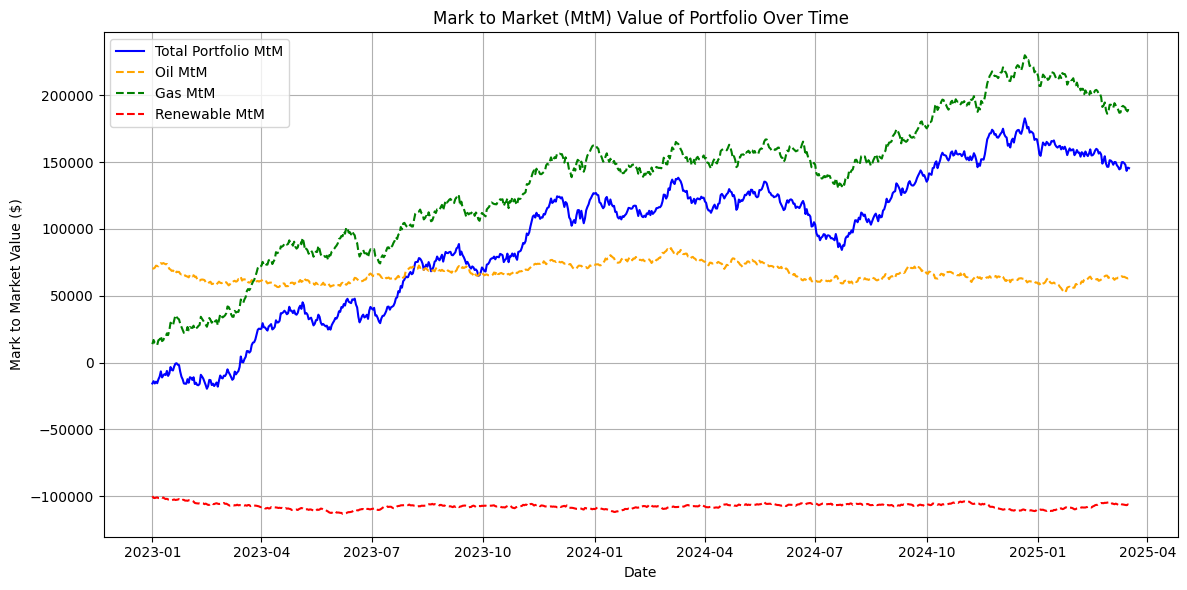

            Oil Price ($/barrel)  Gas Price ($/MMBtu)  Renewable Index ($)  \
Date                                                                         
2023-01-01             70.496714             2.760626            49.963904   
2023-01-02             70.358450             3.388504            50.602526   
2023-01-03             71.006138             2.941200            50.662276   
2023-01-04             72.529168             2.847764            50.511918   
2023-01-05             72.295015             2.627899            50.426646   

             MtM Oil ($)   MtM Gas ($)  MtM Renewable ($)  Total MtM ($)  
Date                                                                      
2023-01-01  70496.714153  13803.128446      -99927.808035  -15627.965436  
2023-01-02  70358.449852  16942.518760     -101205.051062  -13904.082450  
2023-01-03  71006.138390  14706.000504     -101324.552225  -15612.413331  
2023-01-04  72529.168246  14238.821394     -101023.835805  -14255.846165  
202

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate daily prices for commodities: oil, gas, and renewables
dates = pd.date_range(start="2023-01-01", end="2025-03-17", freq="D")
n = len(dates)

# Simulate commodity prices with random walk + trend
oil_prices = np.cumsum(np.random.normal(0, 1, n)) + 70  # Oil starts at $70/barrel
gas_prices = np.cumsum(np.random.normal(0, 0.5, n)) + 3  # Gas starts at $3/MMBtu
renewable_prices = np.cumsum(np.random.normal(0, 0.2, n)) + 50  # Renewable index starts at $50

# Simulate portfolio positions (quantities held)
oil_position = 1000  # Long position in oil contracts (1000 barrels)
gas_position = 5000  # Long position in gas contracts (5000 MMBtu)
renewable_position = -2000  # Short position in renewable contracts (2000 units)

# Calculate daily Mark to Market (MtM) value of the portfolio
mtm_oil = oil_prices * oil_position
mtm_gas = gas_prices * gas_position
mtm_renewable = renewable_prices * renewable_position

# Total MtM value of the portfolio
total_mtm = mtm_oil + mtm_gas + mtm_renewable

# Create a DataFrame for visualization and analysis
df_mtm = pd.DataFrame({
    "Date": dates,
    "Oil Price ($/barrel)": oil_prices,
    "Gas Price ($/MMBtu)": gas_prices,
    "Renewable Index ($)": renewable_prices,
    "MtM Oil ($)": mtm_oil,
    "MtM Gas ($)": mtm_gas,
    "MtM Renewable ($)": mtm_renewable,
    "Total MtM ($)": total_mtm,
})
df_mtm.set_index("Date", inplace=True)

# Plot the simulated MtM values
plt.figure(figsize=(12, 6))
plt.plot(df_mtm.index, df_mtm["Total MtM ($)"], label="Total Portfolio MtM", color="blue")
plt.plot(df_mtm.index, df_mtm["MtM Oil ($)"], label="Oil MtM", color="orange", linestyle="--")
plt.plot(df_mtm.index, df_mtm["MtM Gas ($)"], label="Gas MtM", color="green", linestyle="--")
plt.plot(df_mtm.index, df_mtm["MtM Renewable ($)"], label="Renewable MtM", color="red", linestyle="--")
plt.title("Mark to Market (MtM) Value of Portfolio Over Time")
plt.xlabel("Date")
plt.ylabel("Mark to Market Value ($)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display the first few rows of the simulated data
print(df_mtm.head())


# Explanation of the Code

## Simulated Prices:
- I simulate daily prices for oil, gas, and a renewable energy index using a random walk with a slight trend.
- Oil prices start at $70/barrel, gas prices at $3/MMBtu, and renewables at $50.

## Portfolio Positions:
- The portfolio includes long positions in oil and gas and a short position in renewables.
- Positions represent quantities held (e.g., barrels of oil or MMBtu of gas).

## Mark to Market (MtM) Calculation:
- The MtM value for each commodity is calculated as `price * position`.
- The total portfolio MtM is the sum of the individual MtMs.

## Visualization:
- The plot shows the MtM values for each commodity and the total portfolio over time.

## Output Data:
- The first few rows of the simulated dataset are printed for reference.
